In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib notebook

In [207]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [208]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [209]:
all_data = [train, test]

for data in all_data:
    data["Sex"] = data["Sex"].map({'female': 0, 'male': 1, 1: 1, 0: 0}).astype(int)
    data['Embarked'] = data['Embarked'].fillna(-1)
    data['Fare'] = data['Fare'].fillna(0)
    data["Embarked"] = data["Embarked"].map({'S': 0, 'Q': 1, "C":2, 2: 2, 1: 1, 0: 0, -1: -1}).astype(int)
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data.loc[ data['Age'] <= 18, 'AgeGroup']  = 0
    data.loc[(data['Age'] > 18) & (data['Age'] <= 35), 'AgeGroup'] = 1
    data.loc[(data['Age'] > 35) & (data['Age'] <= 60), 'AgeGroup'] = 2
    data.loc[ data['Age'] > 60, 'AgeGroup'] = 3
    
    
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0


In [210]:
def surviveRate(className, group):
    return "%i/%i" %(sum(train.loc[ train[className] == group, 'Survived']),
                                len(train.loc[ train[className] == group, 'Survived']))

In [211]:
print("female %i/%i survived" %(sum(train.loc[ train['Sex'] == 0, 'Survived']),
                                len(train.loc[ train['Sex'] == 0, 'Survived'])))
print("male %i/%i survived" %(sum(train.loc[ train['Sex'] == 1, 'Survived']), 
                              len(train.loc[ train['Sex'] == 1, 'Survived'])))

print("male %i/%i survived" %(sum(train.loc[ train['Age'] < 18, 'Survived']), 
                              len(train.loc[ train['Age'] < 18, 'Survived'])))

female 233/314 survived
male 109/577 survived
male 61/113 survived


In [212]:
print(surviveRate("AgeGroup",0))
print(surviveRate("AgeGroup",1))
print(surviveRate("AgeGroup",2))
print(surviveRate("AgeGroup",3))

70/139
137/358
78/195
5/22


In [213]:
print(surviveRate("Embarked",0))
print(surviveRate("Embarked",1))
print(surviveRate("Embarked",2))

217/644
30/77
93/168


In [214]:
train = train.drop(["PassengerId", "Name", "Cabin", "Ticket", "Age", "SibSp"], axis = 1)
test = test.drop(["PassengerId", "Name", "Cabin", "Ticket", "Age", "SibSp"], axis = 1)

<IPython.core.display.Javascript object>


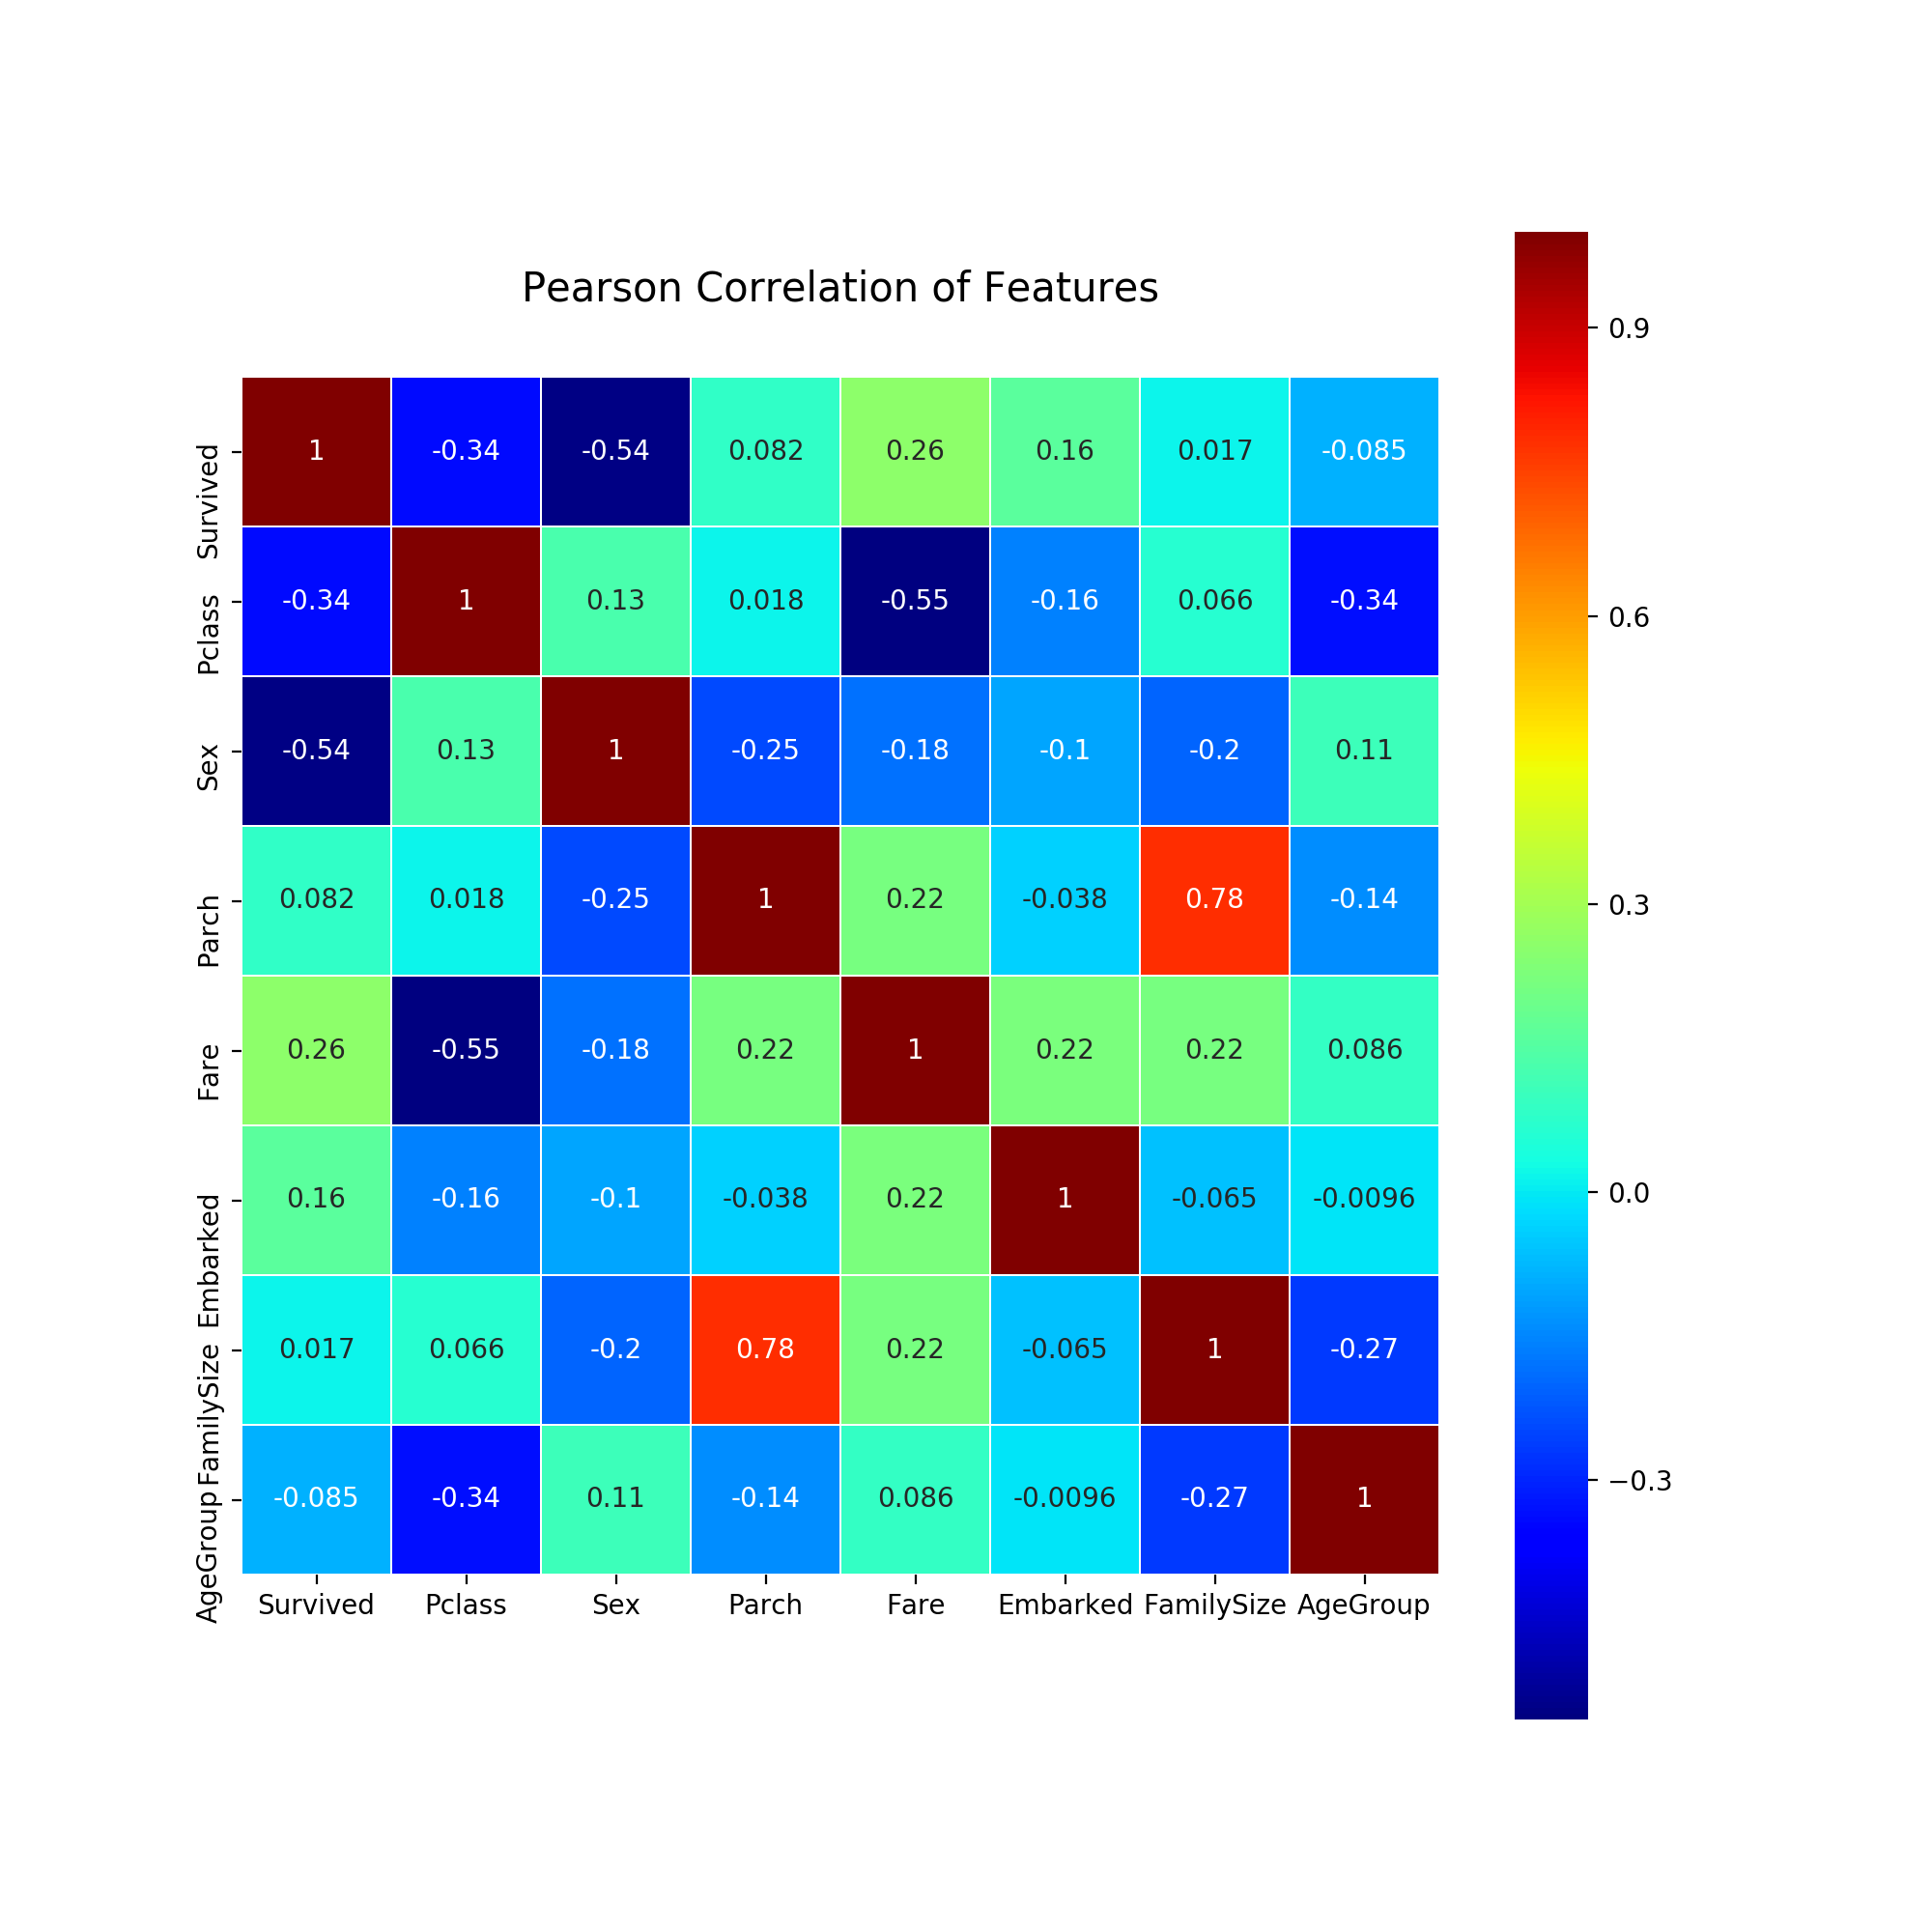

In [215]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap="jet", linecolor='white', annot=True)
plt.show()

In [216]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier



In [239]:
clf = DecisionTreeClassifier()

predicted = cross_val_predict(clf,train[["Sex", "Pclass", "Fare", "Embarked"]],train["Survived"],cv=10)
print(metrics.classification_report(train["Survived"],predicted))
print("Accuracy score: %.2f"%metrics.accuracy_score(train["Survived"],predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(train["Survived"],predicted))

clf.fit(train[["Sex", "Pclass", "Fare", "Embarked"]],train["Survived"])
print(clf.predict(test[["Sex", "Pclass", "Fare", "Embarked"]]))

result = pd.read_csv('./test.csv')
result["Survived"] = clf.predict(test[["Sex", "Pclass", "Fare", "Embarked"]])



result[["PassengerId", "Survived"]].to_csv("result.csv", index = False)

             precision    recall  f1-score   support

          0       0.82      0.89      0.86       549
          1       0.80      0.69      0.74       342

avg / total       0.82      0.82      0.81       891

Accuracy score: 0.82
Cohen Kappa score: 0.60
[0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 

In [231]:
from sklearn.svm import SVC

clf = SVC()
predicted = cross_val_predict(clf,train[["Sex", "Pclass", "Fare", "Embarked"]],train["Survived"],cv=10)
print(metrics.classification_report(train["Survived"],predicted))
print("Accuracy score: %.2f"%metrics.accuracy_score(train["Survived"],predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(train["Survived"],predicted))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       549
          1       0.70      0.67      0.68       342

avg / total       0.76      0.76      0.76       891

Accuracy score: 0.76
Cohen Kappa score: 0.49


In [232]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
predicted = cross_val_predict(clf,train[["Sex", "Pclass", "Fare", "Embarked"]],train["Survived"],cv=10)
print(metrics.classification_report(train["Survived"],predicted))
print("Accuracy score: %.2f"%metrics.accuracy_score(train["Survived"],predicted))
print("Cohen Kappa score: %.2f"%metrics.cohen_kappa_score(train["Survived"],predicted))

             precision    recall  f1-score   support

          0       0.81      0.89      0.85       549
          1       0.79      0.68      0.73       342

avg / total       0.81      0.81      0.80       891

Accuracy score: 0.81
Cohen Kappa score: 0.58
